In [ ]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
import scipy.stats as spst

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [ ]:
# 분류 함수
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_predict, GridSearchCV, cross_val_score
from lightgbm import LGBMClassifier
from xgboost import XGBRFClassifier, XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import *

In [ ]:
# 이산형 변수에 대한 단변량 분석 함수
def eda_1_n(data, var, bins = 30) :
    # 기초 통계량
    display(data[[var]].describe().T)

    # 시각화
    plt.figure(figsize = (12,8))
    plt.subplot(2,1,1)
    sns.histplot(data[var], bins = bins, kde = True)
    plt.grid()

    plt.subplot(2,1,2)
    sns.boxplot(x = data[var])
    plt.grid()
    plt.show()

In [ ]:
# 범주형 변수에 대한 단변량 분석 함수
def eda_1_c(data, var) :
    # 기초 통계량
    print(f' <<<  {var}   >>')
    cnt = data[var].value_counts()
    prop = data[var].value_counts()/data.shape[0]
    temp = pd.DataFrame({'Class':cnt.index, 'Count':cnt.values, 'Prop':prop.values})
    display(temp)
    # 시각화
    sns.countplot(x = var, data = data)
    plt.grid()
    plt.show()

In [ ]:
def eda_2_nn(data, feature, target) :
    # 상관분석
    result = spst.pearsonr(temp[feature], temp[target])
    print(f'상관계수 : {result[0]}, P-value : {result[1]}')

    # 산점도
    temp = data.loc[data[feature].notnull()]
    sns.scatterplot( x= feature, y = target, data = temp)
    plt.grid()
    plt.show()


In [ ]:
def eda_2_cn(data, feature, target) :

    # 가설검정
    # 범주의 수 확인
    cat = data[feature].unique()
    n = len(cat)

    # 범주가 2개
    if n == 2 :
        g0 = data.loc[data[feature] == cat[0], target]
        g1 = data.loc[data[feature] == cat[1], target]
        result = spst.ttest_ind(g0, g1)
    else :
        result = spst.f_oneway(*[data.loc[data[feature] == c, target] for c in cat])

    print(result)

    # 시각화 : 평균비교 막대그래프
    sns.barplot(x = feature, y = target, data = data)
    plt.grid()
    plt.show()

In [ ]:
data = pd.read_csv('/content/train.csv')

In [ ]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


## Object



In [ ]:
data_copy = data.copy()

In [ ]:
data_copy['HomePlanet'].value_counts()

,count
HomePlanet,
Earth,4602
Europa,2131
Mars,1759


In [ ]:
data_copy['CryoSleep'].value_counts()

,count
CryoSleep,
False,5439
True,3037


In [ ]:
data_copy['Destination'].value_counts()

,count
Destination,
TRAPPIST-1e,5915
55 Cancri e,1800
PSO J318.5-22,796


In [ ]:
data_copy['VIP'].value_counts()

,count
VIP,
False,8291
True,199


## 전처리

In [ ]:
# Drop: Name, PassengerId, Canin
data.drop(['Name', 'PassengerId', 'Cabin'], axis = 1, inplace = True)

In [ ]:
data.isna().sum()

,0
HomePlanet,201
CryoSleep,217
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208
Spa,183
VRDeck,188


In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
data_columns = data.columns

In [ ]:
imputer = KNNImputer(n_neighbors = 5)

In [ ]:
data['HomePlanet'] = data['HomePlanet'].replace({'Earth': 0, 'Europa': 1, 'Mars': 2})
data['CryoSleep'] = data['CryoSleep'].replace({False: 0, True: 1})
data['Destination'] = data['Destination'].replace({'TRAPPIST-1e': 0, '55 Cancri e': 1, 'PSO J318.5-22': 2})
data['VIP'] = data['VIP'].replace({False: 0, True: 1})
data['Transported'] = data['Transported'].replace({False: 0, True: 1})

In [ ]:
data = imputer.fit_transform(data)

In [ ]:
data = pd.DataFrame(data, columns = data_columns)
data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1.0,0.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0
2,1.0,0.0,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0
3,1.0,0.0,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0
4,0.0,0.0,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0


In [ ]:
data.isna().sum()

,0
HomePlanet,0
CryoSleep,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0
VRDeck,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   float64
 1   CryoSleep     8693 non-null   float64
 2   Destination   8693 non-null   float64
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   float64
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   float64
dtypes: float64(11)
memory usage: 747.2 KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
HomePlanet,8693.0,0.665662,0.792083,0.0,0.0,0.0,1.0,2.0
CryoSleep,8693.0,0.364063,0.478999,0.0,0.0,0.0,1.0,1.0
Destination,8693.0,0.398136,0.647734,0.0,0.0,0.0,1.0,2.0
Age,8693.0,28.793167,14.386120,0.0,19.0,27.0,38.0,79.0
VIP,8693.0,0.023260,0.149757,0.0,0.0,0.0,0.0,1.0
RoomService,8693.0,223.710089,661.711672,0.0,0.0,0.0,51.0,14327.0
FoodCourt,8693.0,452.798827,1597.226823,0.0,0.0,0.0,81.0,29813.0
ShoppingMall,8693.0,172.318785,598.378231,0.0,0.0,0.0,30.0,23492.0
Spa,8693.0,308.081583,1126.099538,0.0,0.0,0.0,62.0,22408.0
VRDeck,8693.0,301.459036,1134.583875,0.0,0.0,0.0,49.0,24133.0


## 성능 예측

In [ ]:
x = data.drop('Transported', axis = 1)
y = data.loc[:, 'Transported']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [ ]:
x_train_s = MinMaxScaler().fit_transform(x_train)
x_test_s = MinMaxScaler().fit_transform(x_test)

In [ ]:
x_train_s_2 = StandardScaler().fit_transform(x_train)
x_test_s_2 = StandardScaler().fit_transform(x_test)

In [ ]:
cv_score = cross_val_score(SVC(), x_train_s_2, y_train, cv=5)

# 결과확인
print('평균:', cv_score.mean())

# 결과수집
result = {}
result['KNN'] = cv_score.mean()

평균: 0.7858782822771258


### KNN

In [ ]:
cv_score = cross_val_score(KNeighborsClassifier(), x_train_s_2, y_train, cv=5)

# 결과확인
print('평균:', cv_score.mean())

# 결과수집
result = {}
result['KNN'] = cv_score.mean()

평균: 0.7677596470630828


In [ ]:
cv_score = cross_val_score(KNeighborsClassifier(), x_train_s, y_train, cv=5)

# 결과확인
print('평균:', cv_score.mean())

# 결과수집
result = {}
result['KNN'] = cv_score.mean()

평균: 0.761143838344134


### Decision Tree

In [ ]:
# 성능예측
cv_score = cross_val_score(DecisionTreeClassifier(), x_train, y_train, cv=5)

# 결과확인
print('평균:', cv_score.mean())

# 결과수집
result['Decision Tree'] = cv_score.mean()

평균: 0.7381378750342644


### Logistic Regression

In [ ]:
# 성능예측
cv_score = cross_val_score(LogisticRegression(), x_train, y_train, cv=5)

# 결과확인
print('평균:', cv_score.mean())

# 결과수집
result['Logistic Regression'] = cv_score.mean()

평균: 0.7834344113494252


### Random Forest

In [ ]:
# 성능예측
cv_score = cross_val_score(RandomForestClassifier(), x_train, y_train, cv=5)

# 결과확인
print('평균:', cv_score.mean())

# 결과수집
result['Random Forest'] = cv_score.mean()

평균: 0.7877487858742481


### XGBoost

In [ ]:
# 성능예측
cv_score = cross_val_score(XGBClassifier(), x_train, y_train, cv=5)

# 결과확인
print('평균:', cv_score.mean())

# 결과수집
result['XGBoost'] = cv_score.mean()

평균: 0.7897616227650518


### LightGBM

In [ ]:
# 성능예측
cv_score = cross_val_score(LGBMClassifier(verbose=-1), x_train, y_train, cv=5)

# 결과확인
print('평균:', cv_score.mean())

# 결과수집
result['LightGBM'] = cv_score.mean()

평균: 0.7986774175196147


### 결과 확인

In [ ]:
# 성능 비교
print('=' * 40)
for m_name, score in result.items():
    print(m_name, score.round(3))
print('=' * 40)

KNN 0.761
Decision Tree 0.739
Logistic Regression 0.783
Random Forest 0.79
XGBoost 0.79
LightGBM 0.799


## 튜닝

In [ ]:
# 모델 정의
model = LGBMClassifier()

# 하이퍼파라미터 그리드 정의
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'n_estimators': range(50, 301, 50),
    'max_depth': range(3, 20)  # 3부터 20까지의 깊이를 설정
}

# 그리드 서치 설정
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# 데이터에 맞춰 피팅
grid_search.fit(x_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)
print("최적의 점수:", grid_search.best_score_)

최적의 하이퍼파라미터: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 175}
최적의 점수: 0.8028475968326705


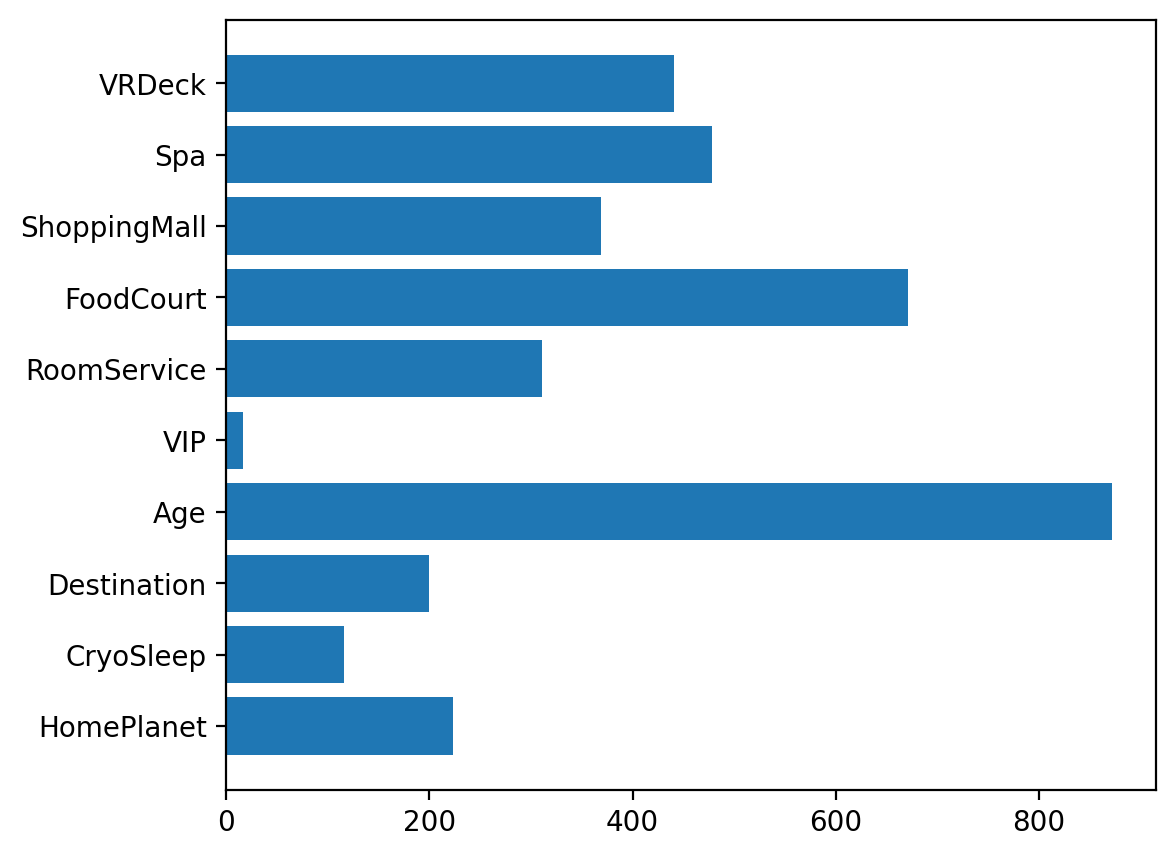

In [ ]:
# 변수 중요도 시각화
plt.figure(figsize=(6, 5))
plt.barh(list(x), grid_search.best_estimator_.feature_importances_)
plt.show()

In [ ]:
# 모델 저장
from google.colab import drive
drive.mount('/content/drive')

import pickle

# Grid Search 모델을 Google Drive에 저장
with open('/content/drive/My Drive/grid_search_model.pkl', 'wb') as file:
    pickle.dump(grid_search, file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 예측하기
y_pred = grid_search.predict(x_test)

In [ ]:
# 성능평가
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[652 199]
 [130 758]]
              precision    recall  f1-score   support

         0.0       0.83      0.77      0.80       851
         1.0       0.79      0.85      0.82       888

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



## Test

In [ ]:
test = pd.read_csv('/test.csv')

In [ ]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
test.isna().sum()

,0
PassengerId,0
HomePlanet,87
CryoSleep,93
Cabin,100
Destination,92
Age,91
VIP,93
RoomService,82
FoodCourt,106
ShoppingMall,98


In [ ]:
test_id = test.loc[:, 'PassengerId']

In [ ]:
# Drop: Name, PassengerId, Canin
test.drop(['Name', 'PassengerId', 'Cabin'], axis = 1, inplace = True)

In [ ]:
test_columns = test.columns

In [ ]:
mputer = KNNImputer(n_neighbors = 5)

In [ ]:
test['HomePlanet'] = test['HomePlanet'].replace({'Earth': 0, 'Europa': 1, 'Mars': 2})
test['CryoSleep'] = test['CryoSleep'].replace({False: 0, True: 1})
test['Destination'] = test['Destination'].replace({'TRAPPIST-1e': 0, '55 Cancri e': 1, 'PSO J318.5-22': 2})
test['VIP'] = test['VIP'].replace({False: 0, True: 1})

In [ ]:
test = imputer.fit_transform(test)

In [ ]:
test = pd.DataFrame(test, columns = test_columns)
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,1.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0
2,1.0,1.0,1.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0
4,0.0,0.0,0.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0


In [ ]:
test.isna().sum()

,0
HomePlanet,0
CryoSleep,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0
VRDeck,0


In [ ]:
test['Transported'] = grid_search.predict(test)

In [ ]:
test['Transported'] = test['Transported'].astype(bool)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   float64
 1   CryoSleep     4277 non-null   float64
 2   Destination   4277 non-null   float64
 3   Age           4277 non-null   float64
 4   VIP           4277 non-null   float64
 5   RoomService   4277 non-null   float64
 6   FoodCourt     4277 non-null   float64
 7   ShoppingMall  4277 non-null   float64
 8   Spa           4277 non-null   float64
 9   VRDeck        4277 non-null   float64
 10  Transported   4277 non-null   bool   
dtypes: bool(1), float64(10)
memory usage: 338.4 KB


In [ ]:
test = pd.concat([test_id, test], axis = 1)

In [ ]:
test = test.loc[:, ['PassengerId', 'Transported']]

## Submission

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


In [ ]:
submission = pd.read_csv('/sample_submission.csv')

submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


## to_csv

In [ ]:
# test_data를 CSV 파일로 내보내기
output_file_path = '/content/drive/My Drive/Spaceship_Titanic.csv'  # 파일 경로를 수정하세요
test.to_csv(output_file_path, index=False)  # index=False로 인덱스를 포함하지 않음

print(f"파일이 성공적으로 저장되었습니다: {output_file_path}")


파일이 성공적으로 저장되었습니다: /content/drive/My Drive/Spaceship_Titanic.csv
